<div class="alert alert-block" style="color: skyblue">
    <h1><center> DAKD 2024 EXERCISE 3: UNSUPERVISED LEARNING  </center></h1>

### <font color = skyblue> *** FILL YOUR INFORMATION BELOW *** </font>
(Name) Mst Ayesha Sultana <br>
(Student number) 2406862 <br>
(UTU email) ayesha.m.sultana@utu.fi <br>
(Date) 13.12.2024 <br>

___
#### General Guidance for Exercises

- **Complete all tasks**: Make sure to answer all questions, even if you cannot get your script to fully work.
- **Code clarity**: Write clear and readable code. Include comments to explain what your code does.
- **Effective visualizations**: Ensure all plots have labeled axes, legends, and captions. Your visualizations should clearly represent the underlying data.
- **Notebook organization**: You can add more code or markdown cells to improve the structure of your notebook as long as it maintains a logical flow.
- **Submission**: Submit both the `.ipynb` and `.html` or `.pdf` versions of your notebook. Before finalizing your notebook, use the "Restart & Run All" feature to ensure it runs correctly.
- **Grading criteria**:
    - The grading scale is *Fail/Pass/Pass with honors* (+1).
    - To pass, you must complete the required parts 0-3.
    - To achieve *Pass with honors*, complete the bonus exercises.
- **Technical issues**:
    - If you encounter problems, start with an online search to find solutions but do not simply copy and paste code. Understand any code you use and integrate it appropriately.
    - Cite all external sources used, whether for code or explanations.
    - If problems persist, ask for help in the course discussion forum, at exercise sessions, or via email at konsta.k.nyman@utu.fi or antti.s.vasankari@utu.fi.
- **Use of AI and large language models**:
    - We do not encourage the use of AI tools like ChatGPT. If you use them, critically evaluate their outputs.
    - Describe how you used the AI tools in your work, including your input and how the output was beneficial.
- **Time management**: Do not leave your work until the last moment. No feedback will be available during weekends.

**Additional Notes**:
- You can find the specific deadlines and session times for each assignment on the Moodle course page.
- Ensure all your answers are concise—typically a few sentences per question.
- Your .ipynb notebook is expected to be run to completion, which means that it should execute without errors when all cells are run in sequence.
<br><br>
___

#### Exercise instructions

This is the template for the third exercise. The purpose of this exercise is to familiarize yourself with the basics of unsupervised learning by using the agglomerative hierarchical clustering and k-means clustering algorithms to find patterns.

This exercise uses the seeds dataset, available on moodle as `seeds.csv`. The features are all numeric. They quantify the measurements related to the geometrical properties of wheat grains. The feature names are listed in the table below.

| Feature | Type 
| :--- | ---: 
| Area | Numeric (float)
| Perimeter | Numeric (float)
| Compactness | Numeric (float)
| Length | Numeric (float)
| Width | Numeric (float)
| Asymmetry Coefficient | Numeric (float)
| Length Groove | Numeric (float)

<br>


In real applications, visualizing various aspects of the data the data and data scrubbing are important steps. However, in this exercise you can treat the data as given, and focus on the unsupervised methods. **REMEMBER, this step can never be neglected in the real world.** <br><br>
___

#### Library imports, Jupyter Notebook settings etc.

The below libraries are sufficient to complete the exercise. You can import additional modules here if you want.

In [1]:
import itertools # has some utilities that may be useful in the exercise

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA

# IPython magic command to display matplotlib figures together with the output
# (Often the default setting in a Jupyter Notebook context, so your figures probably work fine without it)
%matplotlib inline

### Part 0: Read the data

- Download the exercise 3 data on the **Moodle** page of this course. (`seeds.csv`)
- Read the data into a Pandas dataframe.
- Display a few rows and some basic information to make sure the data was loaded correctly

In [2]:
# YOUR CODE

# Path for the data
data_path = 'seeds.csv'

# Read the CSV file 
df = pd.read_csv(data_path)

In [3]:
# Display first 10 rows
df.head(10)

,area,perimeter,compactness,length,width,asymmetry_coef,length_groove
0,18.45,16.12,0.8921,6.107,3.769,2.235,5.794
1,11.41,12.95,0.8560,5.090,2.775,4.957,4.825
2,10.79,12.93,0.8107,5.317,2.648,5.462,5.194
3,18.14,16.12,0.8772,6.059,3.563,3.619,6.011
4,15.38,14.90,0.8706,5.884,3.268,4.462,5.795
5,14.46,14.35,0.8818,5.388,3.377,2.802,5.044
6,18.59,16.05,0.9066,6.037,3.860,6.001,5.877
7,20.10,16.99,0.8746,6.581,3.785,1.955,6.449
8,13.94,14.17,0.8728,5.585,3.150,2.124,5.012
9,19.15,16.45,0.8890,6.245,3.815,3.084,6.185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            210 non-null    float64
 1   perimeter       210 non-null    float64
 2   compactness     210 non-null    float64
 3   length          210 non-null    float64
 4   width           210 non-null    float64
 5   asymmetry_coef  210 non-null    float64
 6   length_groove   210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


### Part 1: Preprocess and visualize the data

 - Perform z-score standardization on the features to ensure that all features have the same scale.
 - Explain briefly why this is important.
 - For visualization, project the data to two dimensions by using principal component analysis (PCA).
 - **These PCs are solely used for plotting the data.** The clusterings are done on the original standardized features.

In [5]:
# YOUR CODE

# Z-score Standardization to the features
standardized_data = StandardScaler().fit_transform(df)

<div style="color: skyblue;">
YOUR ANSWER


Z-score standardization transforms the features of a dataset to have a mean of 0 and a standard deviation of 1. This is particularly useful when the features have different units or scales, as it ensures that each feature contributes equally to the model. Without standardization, features with larger numerical ranges could dominate the learning process, leading to biased models. Z-score standardization normalizes the data, making it easier to compare and interpret, and improving the performance and convergence of algorithms.

In [6]:
# Project the standardized data into two dimensions using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(standardized_data)

# Using a data frame to store PCA-transformed data
pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

# Showing first five row from PCA
print(pca_df.head())

        PC1       PC2
0  2.793992 -0.678534
1 -2.879445  0.252369
2 -3.190435  1.932603
3  2.350647  0.522911
4  0.693173  0.813675


 - Visualize the resulting two-dimensional data in a scatter plot.
 - Does it look like there are clear clusters? Don't worry if they're hard to see. There may be more than one "correct" answer.
 - Draw shapes (for example `matplotlib.patches.Ellipse`) on top of the scatter plot to visualize any clusters you feel you can easily detect.

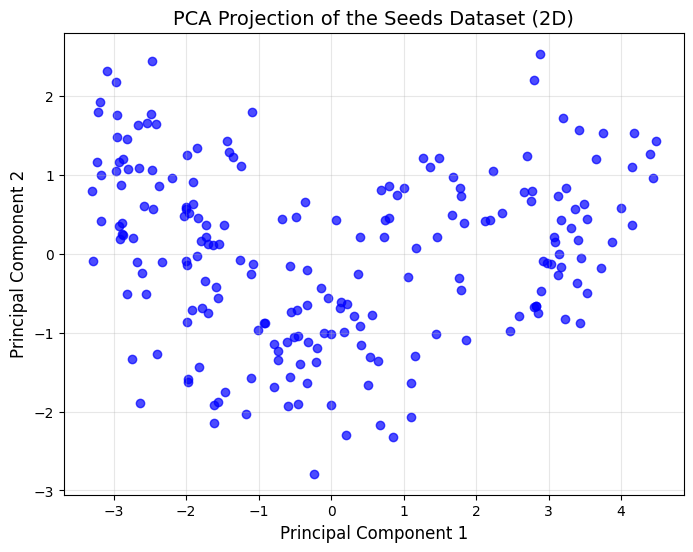

In [7]:
# YOUR CODE

# Using a scatter plot to visualize the 2D data
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='blue', alpha=0.7)
plt.title('PCA Projection of the Seeds Dataset (2D)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

<div style="color: green;">
YOUR ANSWER


From this scatter plot, it is somewhat difficult to see clear, well-separated clusters. However, there do appear to be regions where the data points are more densely packed, suggesting possible clusters. For example:

- There seems to be a group of points on the left side of the plot (around PC1: -3 to -1, PC2: -1 to +2).
- Another group is on the right side (around PC1: +3 to +4, PC2: -1 to +1).
- Some points in the center appear more dispersed, possibly forming a transition between these clusters.

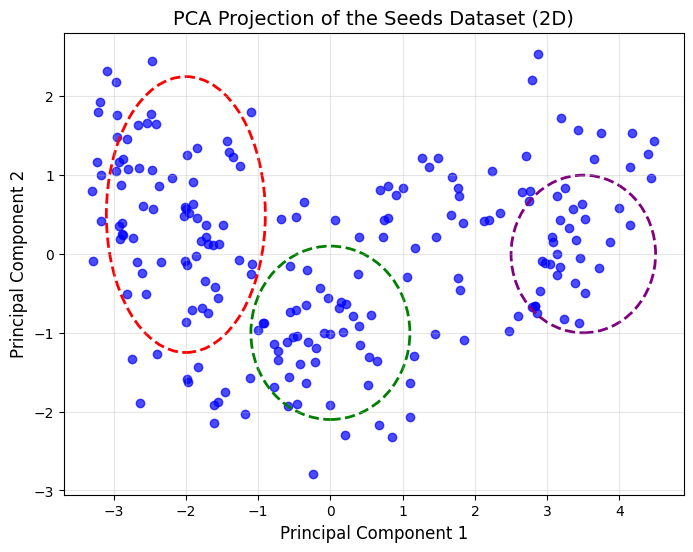

In [8]:
# Creating a scatter plot with ellipses to visualize the clusters which are visible
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='blue', alpha=0.7)

# Add ellipses to visualize clusters
ax = plt.gca()
ellipse1 = Ellipse(xy=(-2.0, 0.5), width=2.2, height=3.5, angle=0, edgecolor='red', facecolor='none', lw=2, linestyle='--')
ellipse2 = Ellipse(xy=(0.0, -1.0), width=2.2, height=2.2, angle=0, edgecolor='green', facecolor='none', lw=2, linestyle='--')
ellipse3 = Ellipse(xy=(3.5, 0.0), width=2, height=2, angle=0, edgecolor='purple', facecolor='none', lw=2, linestyle='--')

# Add ellipses to the plot
ax.add_patch(ellipse1)
ax.add_patch(ellipse2)
ax.add_patch(ellipse3)

# Add plot details
plt.title('PCA Projection of the Seeds Dataset (2D)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(alpha=0.3)

# Display the plot
plt.show()


### Part 2a: Agglomerative hierarchical clustering theory
Explain briefly the different linkage criterion values.
- Single: <p style="color: skyblue;">YOUR ANSWER</p>
Single linkage calculates the distance between two clusters as the minimum distance between any point in one cluster and any point in the other cluster. This approach tends to merge clusters that are close to each other at any single point, which can lead to the formation of elongated, chain-like clusters. While single linkage is good at identifying irregularly shaped clusters, it is sensitive to noise and outliers, as a single outlier can cause clusters to link incorrectly.

- Average: <p style="color: skyblue;">YOUR ANSWER</p>
Average linkage measures the distance between two clusters as the average distance between all pairs of points, where one point is taken from each cluster. This approach is a balance between single and complete linkage, often producing clusters that are neither too compact nor too elongated. Average linkage is robust and works well for a variety of cluster shapes, but it can be computationally expensive for large datasets since it requires calculating pairwise distances between all points.

- Complete: <p style="color: skyblue;">YOUR ANSWER</p>
Complete linkage calculates the distance between two clusters as the maximum distance between any point in one cluster and any point in the other cluster. This ensures that all points in a merged cluster are relatively close to one another, resulting in compact and tight clusters. However, this method may not perform well with clusters that have elongated or irregular shapes, as it prioritizes minimizing the maximum pairwise distance within a cluster.

- Ward: <p style="color: skyblue;">YOUR ANSWER</p>
Ward’s linkage uses a different strategy by minimizing the increase in total within-cluster variance when two clusters are merged. This method results in compact, spherical clusters and often provides very interpretable results. It is particularly effective for datasets where clusters are evenly sized and relatively well-separated. However, Ward’s linkage assumes that clusters are of similar shape and size, so it may not perform well with irregular or unevenly sized clusters.

Explain the **silhouette coefficient** (silhouette_score).

<div style="color: green;">
YOUR ANSWER


The silhouette coefficient (or silhouette score) is a metric used to evaluate the quality of clustering results. It measures how well each data point fits within its assigned cluster compared to other clusters. The score provides insights into how compact and well-separated the clusters are.

Formula:
For a single data point i:

a(i): The average distance of i to all other points in its own cluster.
b(i): The average distance of i to points in the nearest (or next closest) cluster that it doesn’t belong to.

The silhouette coefficient for i is defined as:
$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$


s(i) ranges from -1 to 1:
- 1: The point is well-clustered and far from neighboring clusters.
- 0: The point lies close to the boundary between clusters.
- -1: The point may be misclassified and assigned to the wrong cluster.


​
 


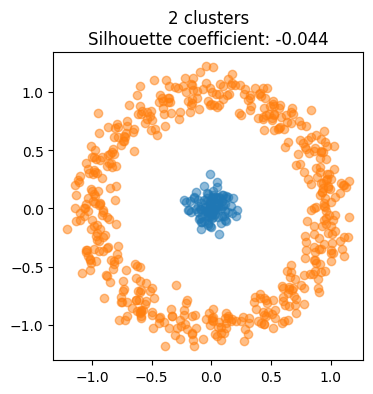

In [9]:
n = 2
no_in = 100
no_out = 500
labels = np.concatenate((np.zeros(no_in), np.ones(no_out)))

inner_cluster = np.random.randn(no_in, 2)*0.1
theta = np.linspace(0, 2*np.pi, no_out)
outer_cluster = np.array([np.cos(theta), np.sin(theta)]).T + np.random.randn(no_out, 2)*0.1
data = np.vstack((inner_cluster, outer_cluster))

score = silhouette_score(data, labels)

plt.figure(figsize=(4, 4))
plt.title(f'{n} clusters\nSilhouette coefficient: {score:.3f}')
for c in range(n):
    plt.scatter(data[labels==c, 0], data[labels==c, 1], alpha=0.5)
    
plt.show()

In the figure above, why is the silhouette coefficient close to zero even though the clusters are clearly distinct?
 
(Optional) What would be a better way to assess this clustering?

 <div style="color: green;">YOUR ANSWER



 The silhouette coefficient measures how similar a data point is to its own cluster compared to other clusters. In this case, while the clusters are visually distinct, the data points within each cluster are not necessarily very similar to each other. This is because the data points are arranged in a ring-like structure, with a significant amount of variation within each cluster.

 
Points in the outer cluster (ring) are thought to be nearer to the points in the inner cluster (center) than they truly are regarding cluster managing. This occurs because Euclidean distance calculates straight-line distances, neglecting the curved shapes of the clusters.

Therefore, the typical intra-cluster distance (a) along with the distance between other clusters (b) lose significance, resulting in a silhouette coefficient near zero, despite the clusters appearing visually different.

### Part 2b: Agglomerative hierarchical clustering practice

Let's get back to the **seeds** dataset.

Cluster the standardized data into 2-10 clusters using agglomerative hierarchical clustering.
- Explore all combinations of the **number of clusters** (2-10) and the **linkage criteria**.
- Calculate the silhouette coefficient for each combination and store the results, as well as the predictions made by the clustering.

*Tip: you can use `itertools.product` function to get the Cartesian product of the two lists of hyperparameters (number of clusters, linkage criterion)*

In [10]:
# YOUR CODE

# Define the range of clusters and linkage criteria
cluster_range = range(2, 11)
linkage_criteria = ['single', 'average', 'complete', 'ward']

# Create a list to store the results
sil_co_results = []

# Iterate over all combinations of clusters and linkage criteria
for n_clusters, linkage in itertools.product(cluster_range, linkage_criteria):
    
    # Perform agglomerative hierarchical clustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    cluster_labels = clustering.fit_predict(standardized_data)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(standardized_data, cluster_labels)
    
    # Store the results
    sil_co_results.append({
        'n_clusters': n_clusters,
        'linkage': linkage,
        'silhouette_score': silhouette_avg,
        'cluster_labels': cluster_labels
    })

# Convert the results into a DataFrame
silhouette_df = pd.DataFrame(sil_co_results)


- Use the silhouette score to determine the best linkage criterion for each number of clusters (2-10).
- For each number of clusters, display the best linkage criterion and the silhouette score, sorted by the score (high to low) as follows:

| Number of clusters | Linkage criterion | Silhouette score
| --- | --- | ---   

In [11]:
# YOUR CODE

best_linkage_for_clusters = []

# Group by the number of clusters and find the best linkage criterion based on silhouette score
for n_clusters in range(2, 11):
    
    # Filter the results for the current number of clusters
    filtered_results = silhouette_df[silhouette_df['n_clusters'] == n_clusters]
    
    # Find the row with the highest silhouette score
    best_result = filtered_results.loc[filtered_results['silhouette_score'].idxmax()]
    
    # Append the best linkage and silhouette score for this number of clusters
    best_linkage_for_clusters.append({
        'Number of clusters': n_clusters,
        'Linkage criterion': best_result['linkage'],
        'Silhouette score': best_result['silhouette_score']
    })

# Convert the results into a DataFrame
best_linkage_df = pd.DataFrame(best_linkage_for_clusters)

# Sort the DataFrame by silhouette score in descending order
best_linkage_df_sorted = best_linkage_df.sort_values(by='Silhouette score', ascending=False)

# Print the sorted DataFrame
print(best_linkage_df_sorted)


   Number of clusters Linkage criterion  Silhouette score
0                   2              ward          0.461297
1                   3              ward          0.392634
2                   4           average          0.354864
3                   5          complete          0.293720
4                   6           average          0.290306
7                   9           average          0.279423
6                   8           average          0.270292
5                   7           average          0.268883
8                  10           average          0.257456


 - Plot four clusterings with **three clusters**, one of each **linkage criterion**, as scatter plots.
 - Again, use the first two PCs for visualization. 
 - Colour the datapoints according to the clusters they were assigned to.
 - The structure of the plot is provided

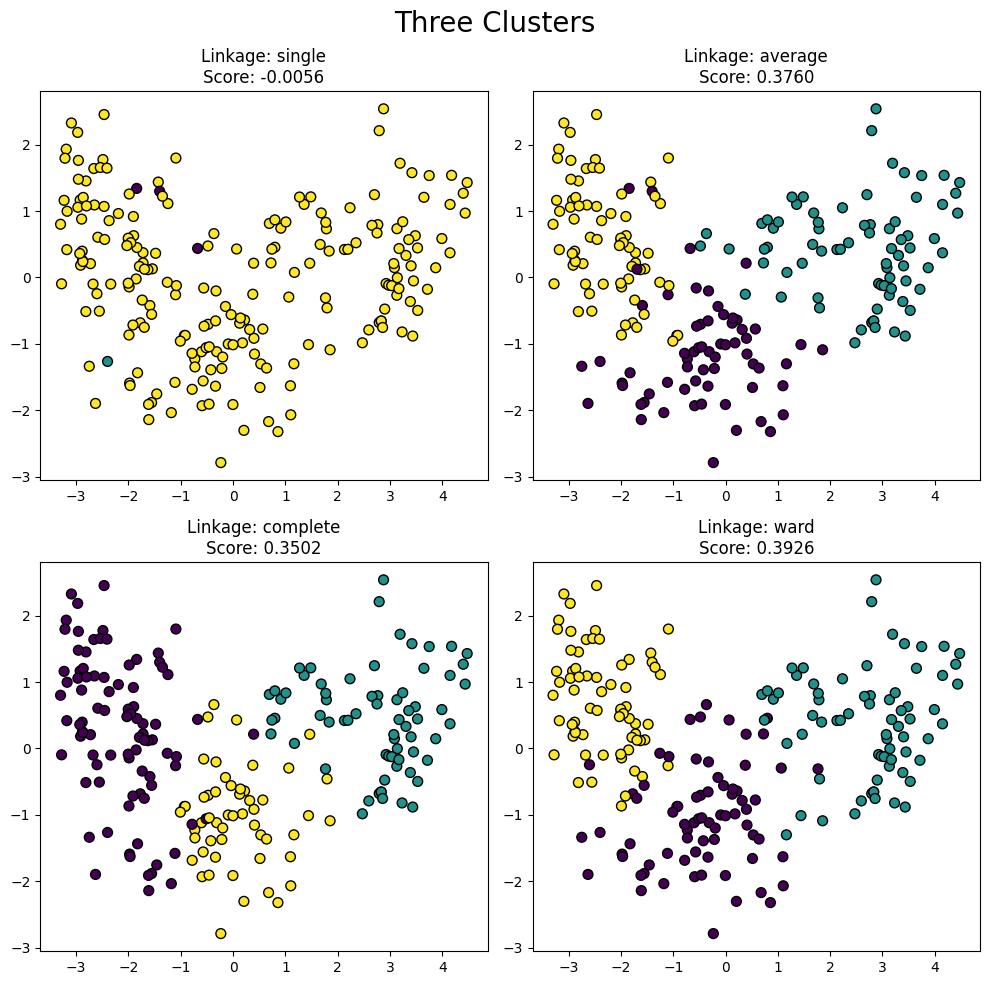

In [12]:
# Filter results for three clusters
filtered_results = silhouette_df[silhouette_df['n_clusters'] == 3]

# Outline for the plots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("Three Clusters", fontsize=20)

axes = axes.flatten()  # Create a single array from a 2D matrix

# Plotting each clustering result
for i, ax in enumerate(axes):
    linkage = linkage_criteria[i]
    
    # Get cluster labels and silhouette score for the current linkage
    cluster_labels = filtered_results[filtered_results['linkage'] == linkage]['cluster_labels'].iloc[0]
    silhouette_scores = filtered_results[filtered_results['linkage'] == linkage]['silhouette_score'].iloc[0]
    
    # Scatter plot
    ax.scatter(pca_df['PC1'], pca_df['PC2'], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
    ax.set_title(f"Linkage: {linkage}\nScore: {silhouette_scores:.4f}", fontsize=12)

plt.tight_layout() 
plt.show()


 - Similarly, from the clusterings using **'ward'** linkage criterion, plot the four clusterings of best performing **number of clusters** as scatter plots.

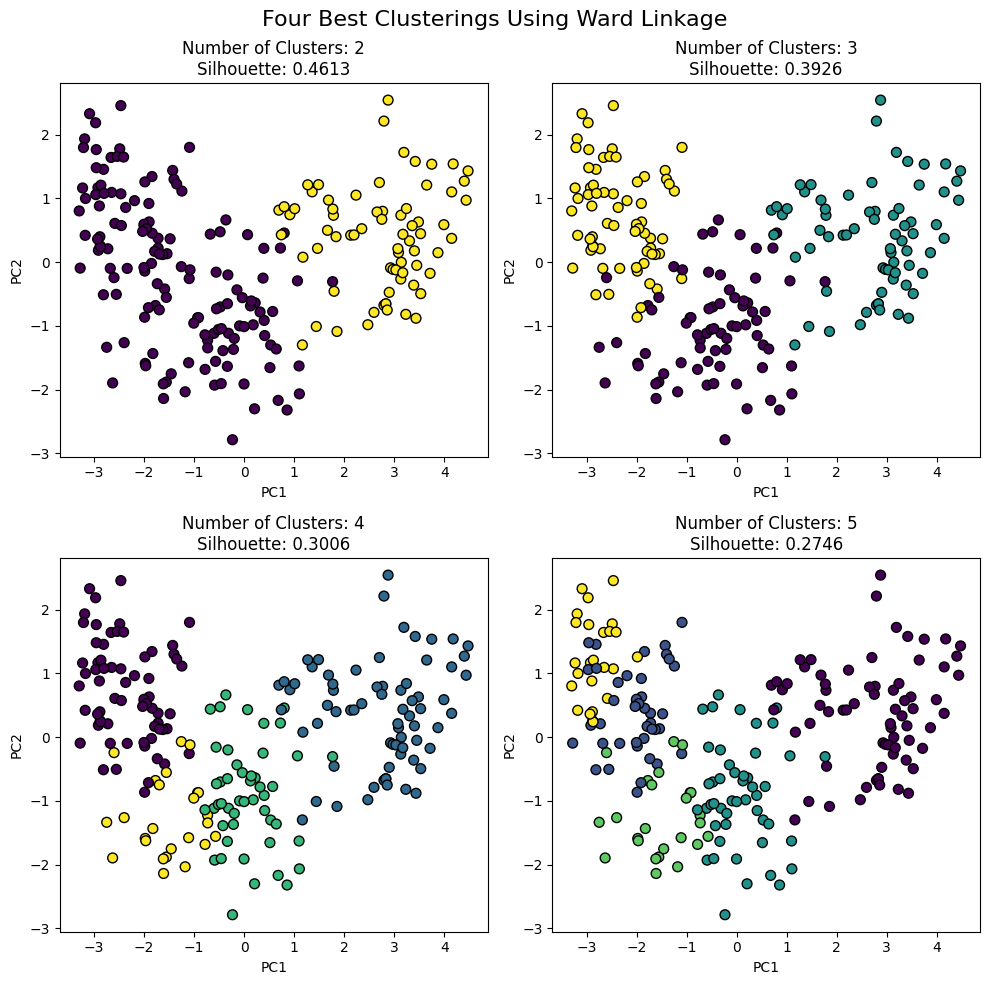

In [13]:
# Filter results for 'ward' linkage
ward_results = silhouette_df[silhouette_df['linkage'] == 'ward']

# Sort by silhouette score to get the four best-performing clusterings
best_ward_results = ward_results.sort_values(by='silhouette_score', ascending=False).head(4)

# Outline for the plots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("Four Best Clusterings Using Ward Linkage", fontsize=16)

axes = axes.flatten()   # creates a single array from a 2D-matrix

# Plot each clustering result
for i, ax in enumerate(axes):
    # Get the number of clusters and corresponding cluster labels
    n_clusters = best_ward_results.iloc[i]['n_clusters']
    cluster_labels = best_ward_results.iloc[i]['cluster_labels']
    silhouette_avg = best_ward_results.iloc[i]['silhouette_score']
    
    # Scatter plot
    scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
    ax.set_title(f"Number of Clusters: {n_clusters}\nSilhouette: {silhouette_avg:.4f}", fontsize=12)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')

plt.tight_layout()
plt.show()


Think about the clusters you see and how the choice of the linkage criterion and the number of clusters affected the formation of clusters. No need to write an answer.

Do some of the clusterings discovered by agglomerative hierarchical clustering correspond to what visually looked like clusters to you in Part 1? Which ones? It's absolutely fine if they don't.

<div style="color: green;">
YOUR ANSWER

Some clusterings found using agglomerative hierarchical clustering match the visual clusters based on Part 1's result (PCA visualization):

1. **Ward Linkage with 2 Clusters**: The division into two large sections is evident in this clustering, which is in good with the visual perception of two separate groups in the PCA plot.


2. **Ward Linkage with 3 Clusters**: The clustering somewhat matches the PCA projection's three clusters showed in Part 1.

### Part 3: _k_-means clustering

- Perform _k_-means clustering on the standardized data. Try 2-10 numbers of clusters.
- Evaluate the clustering performance using the silhouette coefficient.
- Store the centroids of the clusters

In [14]:
# Data: Assuming 'standardized_data' is already created from StandardScaler
kmeans_results = []

# Perform k-means clustering for 2 to 10 clusters
for n_clusters in range(2, 11):
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(standardized_data)
    
     # Store cluster centroids
    centroids = kmeans.cluster_centers_
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(standardized_data, cluster_labels)
    
    # Store the results
    kmeans_results.append({
        'n_clusters': n_clusters,
        'silhouette_score': silhouette_avg,
        'centroids': centroids,
        'cluster_labels': cluster_labels
    })

# Convert results to a DataFrame for better visualization
kmeans_results_df = pd.DataFrame({
    'Number of clusters': [result['n_clusters'] for result in kmeans_results],
    'Silhouette Score': [result['silhouette_score'] for result in kmeans_results]
})

# Display the silhouette scores
print(kmeans_results_df)


   Number of clusters  Silhouette Score
0                   2          0.465772
1                   3          0.400727
2                   4          0.334791
3                   5          0.286215
4                   6          0.291731
5                   7          0.273970
6                   8          0.259347
7                   9          0.254613
8                  10          0.255694


 - Choose the four best numbers of clusters according to silhouette coefficient that you discovered above.
 - Once again visualize them on a scatter plot of the first two principal components.
 - Display the centroids of the clusters on the plot.
 - Remember to transform the centroids to the PCA space.
 - Explain why you need to transform the centroids.

<div style="color: green;">
YOUR ANSWER

We need to transform the centroids because the clustering algorithm operates on the standardized data, but we are visualizing the clusters in the PCA space (which is a transformed version of the standardized data).

To match the centroids with the scatter plot, we need to project the centroids from the original standardized data into the PCA space using the same PCA transformation applied to the data. This ensures the centroids are plotted in the correct location relative to the data points in the PCA plot.

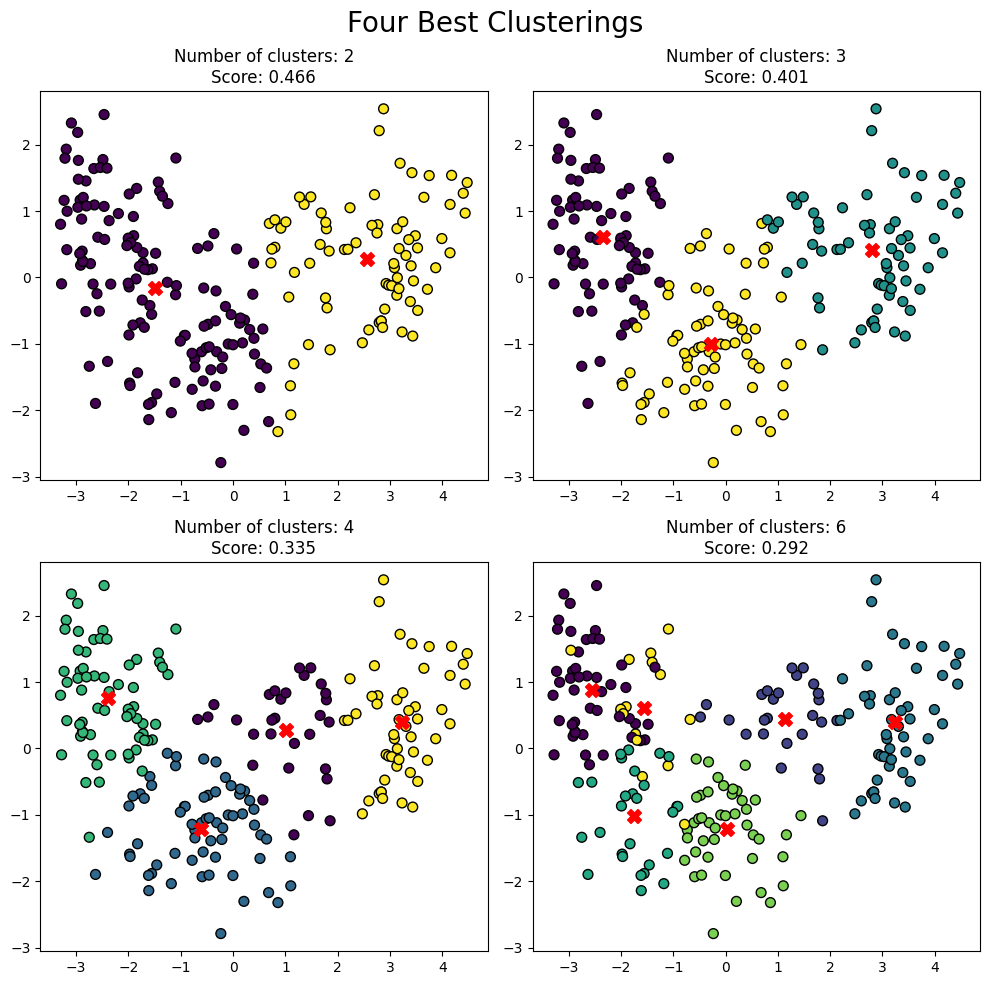

In [15]:

# Sort by silhouette scores and select the top 4 best clustering configurations
best_kmeans = sorted(kmeans_results, key=lambda x: x['silhouette_score'], reverse=True)[:4]

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("Four Best Clusterings", fontsize=20)

axes = axes.flatten() # Creates a single array from a 2D-matrix

for i, ax in enumerate(axes):
    # Get the best k-means clustering result for the current iteration
    n_clusters = best_kmeans[i]['n_clusters']
    cluster_labels = best_kmeans[i]['cluster_labels']
    centroids = best_kmeans[i]['centroids']
    
    # Scatter plot for clusters
    scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
    
    # Transform the centroids from original feature space to PCA space
    pca_centroids = pca.transform(centroids)  # Transform the centroids to PCA space
    
    # Scatter plot for centroids (Red "X" markers)
    ax.scatter(pca_centroids[:, 0], pca_centroids[:, 1], s=100, c='red', marker='X', label='Centroids')

    # Set title including number of clusters and silhouette score
    silhouette_scores = best_kmeans[i]['silhouette_score']
    ax.set_title(f"Number of clusters: {n_clusters}\nScore: {silhouette_scores:.3f}")

plt.tight_layout()
plt.show()

### Part 4 (BONUS): Filling in missing labels using clustering

In this bonus exercise, you're given a dataset with almost all of the labels missing. This is the starting point in semi-supervised learning. Semi-supervised learning in general is beyond the scope of this course, but if you want you can learn more about it, starting e.g. on [the sklearn page for semi-supervised learning](https://scikit-learn.org/stable/modules/semi_supervised.html). **This exercise does not require researching semi-supervised learning, however.**

The dataset used in this exercise is a slightly modified version of [the wine dataset](https://archive.ics.uci.edu/dataset/109/wine). The features quantify chemical properties of wine, grown around the same area in Italy. They are divided to three different classes, simply called `1`, `2` and `3` here. The feature names and their data types are listed in the table below. **Use the modified dataset on Moodle, with the filename `wine_missing_labels.csv`**


| Feature | Type 
| :--- | ---: 
| Alcohol | Numeric (float)
| Malic acid | Numeric (float)
| Ash | Numeric (float)
| Alcalinity of ash | Numeric (float)
| Magnesium | Numeric (integer)
| Total phenols | Numeric (float)
| Flavanoids | Numeric (float)
| Nonflavanoid phenols | Numeric (float)
| Proanthocyanins | Numeric (float)
| Color intensity | Numeric (float)
| Hue | Numeric (float)
| OD280/OD315 of diluted wines | Numeric (float)
| Proline | Numeric (integer)

<br>

First, visualize the first two principal components of the dataset in a scatter plot, showing the labels real for data points you were given. Try to see if the labels look like they belong in what look like clusters on the plot.

In [16]:
# YOUR CODE

file_path = "wine_missing_labels.csv"

# Read the CSV file 
df = pd.read_csv(file_path)

# Checking the values of Label in the given data set
df['Label'].value_counts()

Label
1.0    4
3.0    4
2.0    3
Name: count, dtype: int64

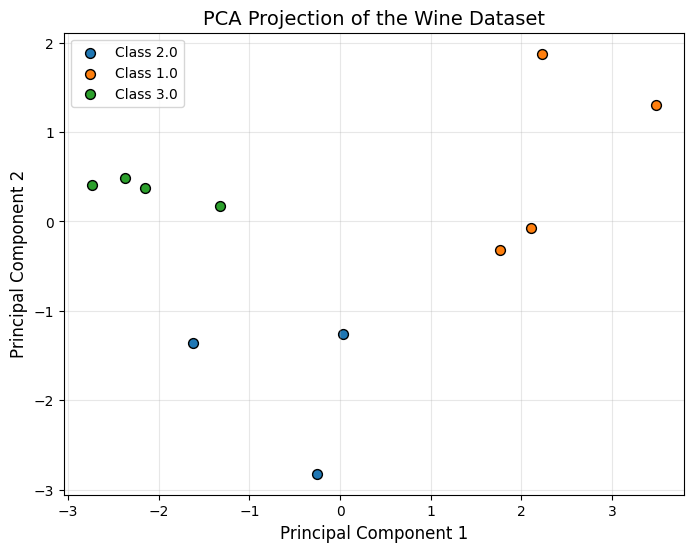

In [17]:
# Selecting features names withouts Labels column
features = df.columns[df.columns != 'Label'].to_list()

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the 2 principal components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# Data from the Label column
labels = df['Label']

# Plot the first two principal components
plt.figure(figsize=(8, 6))

# Plot each label with a different color
for label_value in labels.unique():
    
    # Avoiding NaN value
    if not pd.isna(label_value):
        subset = pca_df[labels == label_value]
        plt.scatter(subset['PC1'], subset['PC2'], label=f'Class {label_value}',  edgecolor='k', s=50)

# Add title and labels
plt.title('PCA Projection of the Wine Dataset', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

<div style="color: green;">
YOUR ANSWER

From the plot, we can observe the following:

**Class 1.0 (orange)**: The data points with the label 1.0 seem to cluster in the upper-right corner. This suggests that Class 1 points naturally form a cluster in the PCA-transformed space.

**Class 2.0 (blue)**: Points labeled as 2.0 are grouped more towards the lower-left region. This separation indicates that Class 2 also forms its own distinct cluster.

**Class 3.0 (green)**: The data points with the label 3.0 are concentrated in the upper-left region, forming another well-defined cluster.

The real labels (1, 2, and 3) appear to align well with the clusters visible in the PCA scatter plot. Each labeled class corresponds to a distinct group of points in the PCA-transformed space, showing minimal overlap between the clusters.

Your task is to use clustering to assign labels to the rows that have a missing value as their label. Do this by first clustering all of the data, and then filling in the missing labels based on which clusters the data points with known labels tend to fit in. 

Use whichever clustering methods you prefer. You can cluster the data into 3 clusters because you have 3 known labels, but you could also try a higher number of clusters that you can then merge.

The details of how exactly you decide which rows get assigned which label are up to you - you can get creative. Describe and justify your thought process.

<br>

You are also given the full labels for the dataset in a separate file called `wine_labels.csv`. Plot the real labels next to the labels that your clustering attempts predicted.

Finally, compute the adjusted Rand index for labels predicted by your clustering solutions and the real labels, and display it along the scatter plots. Rand index is a measure of similarity between two partitions of a set of elements. Adjusted Rand index is corrected for chance using the maximum and expected values of Rand index. Optionally, you can learn more about the Rand index e.g. on [the Wikipedia page for Rand index](https://en.wikipedia.org/wiki/Rand_index). Here you can simply use the `sklearn.metrics.adjusted_rand_score` method imported at the beginning of this notebook without further understanding of it. 

*Hint: you should get something over 0.8*

In [18]:
# YOUR CODE

# Perform K-means clustering to predict labels
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)  # Store cluster labels

# Assign labels based on majority label in each cluster
for cluster in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster]
    
    # Get the majority label in the cluster
    majority_label = cluster_data['Label'].mode()[0] if cluster_data['Label'].notnull().any() else np.nan
    
    # Assign the majority label to the missing labels in this cluster
    df.loc[(df['cluster'] == cluster) & df['Label'].isnull(), 'Label'] = majority_label

# Check if there are still missing labels
missing_labels = df['Label'].isnull().sum()
print(f"Missing labels after clustering and assignment: {missing_labels} \n")

# Print out the first few rows with filled-in labels
print(df.head())

Missing labels after clustering and assignment: 0 

   Label  Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    2.0    11.82        1.47  1.99          20.8         86           1.98   
1    1.0    13.29        1.97  2.68          16.8        102           3.00   
2    1.0    13.05        1.73  2.04          12.4         92           2.72   
3    3.0    12.64        1.36  2.02          16.8        100           2.02   
4    3.0    12.20        3.03  2.32          19.0         96           1.25   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        1.60                  0.30             1.53             1.95  0.95   
1        3.23                  0.31             1.66             6.00  1.07   
2        3.27                  0.17             2.91             7.20  1.12   
3        1.41                  0.53             0.62             5.75  0.98   
4        0.49                  0.40             0.73             5.50  0.66   

In [19]:
# Load the real labels from the 'wine_labels.csv' file
real_labels = pd.read_csv('wine_labels.csv')  
real_labels = real_labels['Label']

# Adding real label to the main data frame
df['real_label'] = real_labels

# Label from Data frame
predicted_labels = df['Label']

# Real labels
real_labels = df['real_label']

# Compute the Adjusted Rand Index between the real labels and predicted labels
ari_score = adjusted_rand_score(real_labels, predicted_labels)
print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")

Adjusted Rand Index (ARI): 0.8636


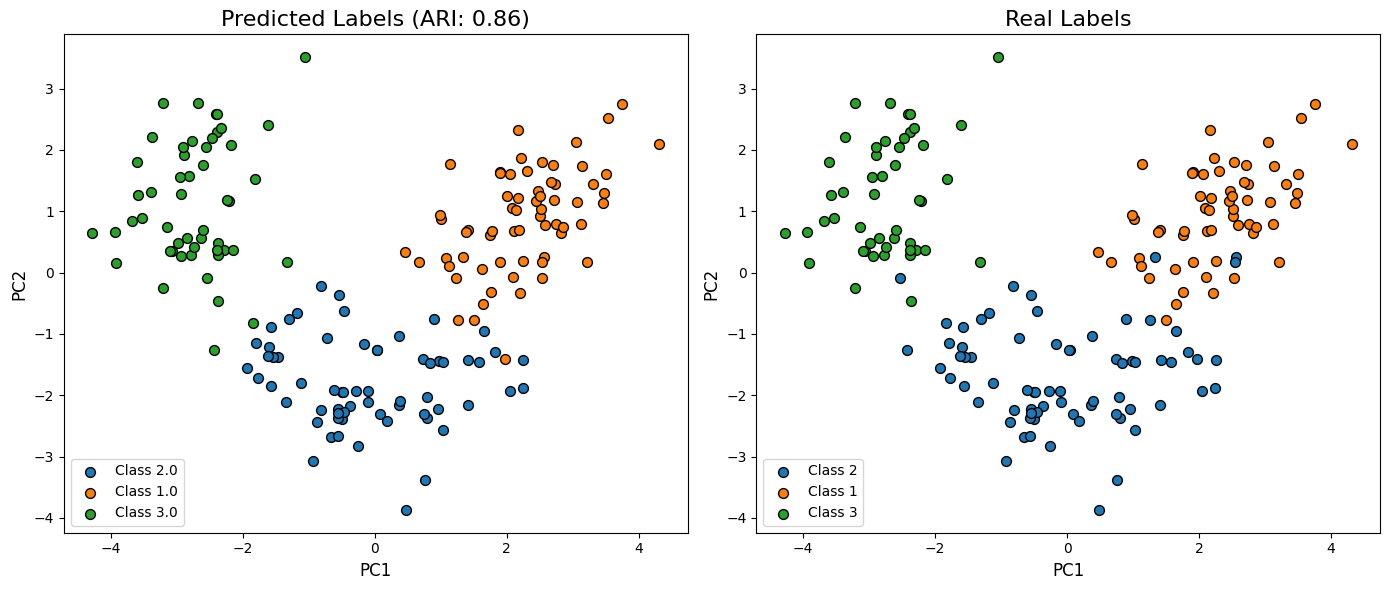

In [20]:
# Plot the predicted labels vs real labels
plt.figure(figsize=(14, 6))

# Scatter plot for predicted labels
plt.subplot(1, 2, 1)
for label_value in predicted_labels.unique():
    subset = pca_df[predicted_labels == label_value]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Class {label_value}',  edgecolor='k', s=50)

plt.title(f"Predicted Labels (ARI: {ari_score:.2f})", fontsize=16)
plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)
plt.legend()


# Scatter plot for real labels
plt.subplot(1, 2, 2)

for label_value in real_labels.unique():
    subset = pca_df[real_labels == label_value]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Class {label_value}',  edgecolor='k', s=50)
    
plt.title("Real Labels", fontsize=16)
plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()


<div style="color: green;">
YOUR ANSWER

Too predict the labels I followed the below Steps:

1. Clustering Using K-Means:

K-Means clustering is performed on the standardized dataset with n_clusters=3 to generate cluster assignments for all data points.
The resulting cluster labels are added to the dataset in a new column called cluster.

2. Assigning Labels Based on Majority Vote:

For each unique cluster, the corresponding data points are extracted into a subset.
The majority label among the existing non-missing labels in that cluster is identified using the mode function.
Missing labels in that cluster are assigned the majority label. If no real labels are present in a cluster, missing labels are left as NaN.

3. Checking for Remaining Missing Labels:

A check is performed to count the number of remaining missing labels after the assignment step, and the result is printed.

4. Loading Real Labels:

The real labels are loaded from an external file, wine_labels.csv, and added as a new column, real_label, to the main dataset.

5. Calculating the Adjusted Rand Index (ARI):

The predicted labels (from the Label column) are compared with the real labels (real_label column) using the Adjusted Rand Index.
The ARI score, which measures the similarity between the predicted and real label assignments, is computed and printed.

6. Visualizing the Predicted and Real Labels:

A scatter plot of the first two principal components (PC1 and PC2) is created for both predicted and real labels.
For the predicted labels, points are plotted with colors corresponding to their cluster assignments. The ARI score is displayed in the plot title.
For the real labels, points are plotted with colors corresponding to the actual label values.
Legends are added to both plots to indicate the label or cluster for each group. The plots are displayed side-by-side for comparison.